# Transformar log em diagrama de gantt

Esse jupyter apenas lê um Log gerado pelo processarEmTempoReal.py e transforma num diagrama de gantt.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from random import randint

In [2]:
#DEFININDO ALGUNS PARÂMETROS DO GRÁFICO
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
params = {
    'figure.figsize': [100, 50], 
    'axes.labelsize': 14,
    'axes.titlesize':18, 
    'font.size': 18,
    'legend.fontsize': 12, 
    'xtick.labelsize': 10, 
    'ytick.labelsize': 10,
    'axes.axisbelow': True
}
plt.rcParams.update(params)

In [3]:
def corAleatoria():
    return "#" + str(randint(10,99)) + str(randint(10,99)) + str(randint(10,99))

### Lendo

In [4]:
# DEFININDO O ARQUIVO LOG QUE QUERO LER
arquivoLog = "/home/pi/Programming/IC2019/Raspberry/Resultados/Logs/logProcessamento_1595026265.812322.txt"

# CRIANDO O DICIONARIO QUE VAI GUARDAR OS DADOS
dictGeral = {}

# LENDO O ARQUIVO LINHA POR LINHA
objFile     = open(arquivoLog, 'r') 
arrayLinhas = objFile.readlines()
for i, linhaAtual in enumerate(arrayLinhas):         
    
    # SEPARANDO POR ESPACOS
    splits = linhaAtual.split(" ")
    
    # DEFININDO AS VARIAVEIS
    idJanela  = splits[0][4:-2]
    comando   = str(splits[1]+splits[2][:-1]).lower()
    timestamp = splits[-1][:-1]
    
    # COLOCANDO NO DICIONARIO - se for inicio de gravacao a gnt tem que criar a chave do 0
    if comando == "iniciogravacao":
        dictGeral[idJanela] = {comando: float(timestamp)}
    else:
        dictGeral[idJanela][comando] = float(timestamp)
        
    # PEGANDO O TEMPO DE REFERENCIA PRA SER O 0:
    if i == 0 and comando == "iniciogravacao":
        tempoReferencia = float(timestamp)

### Printando

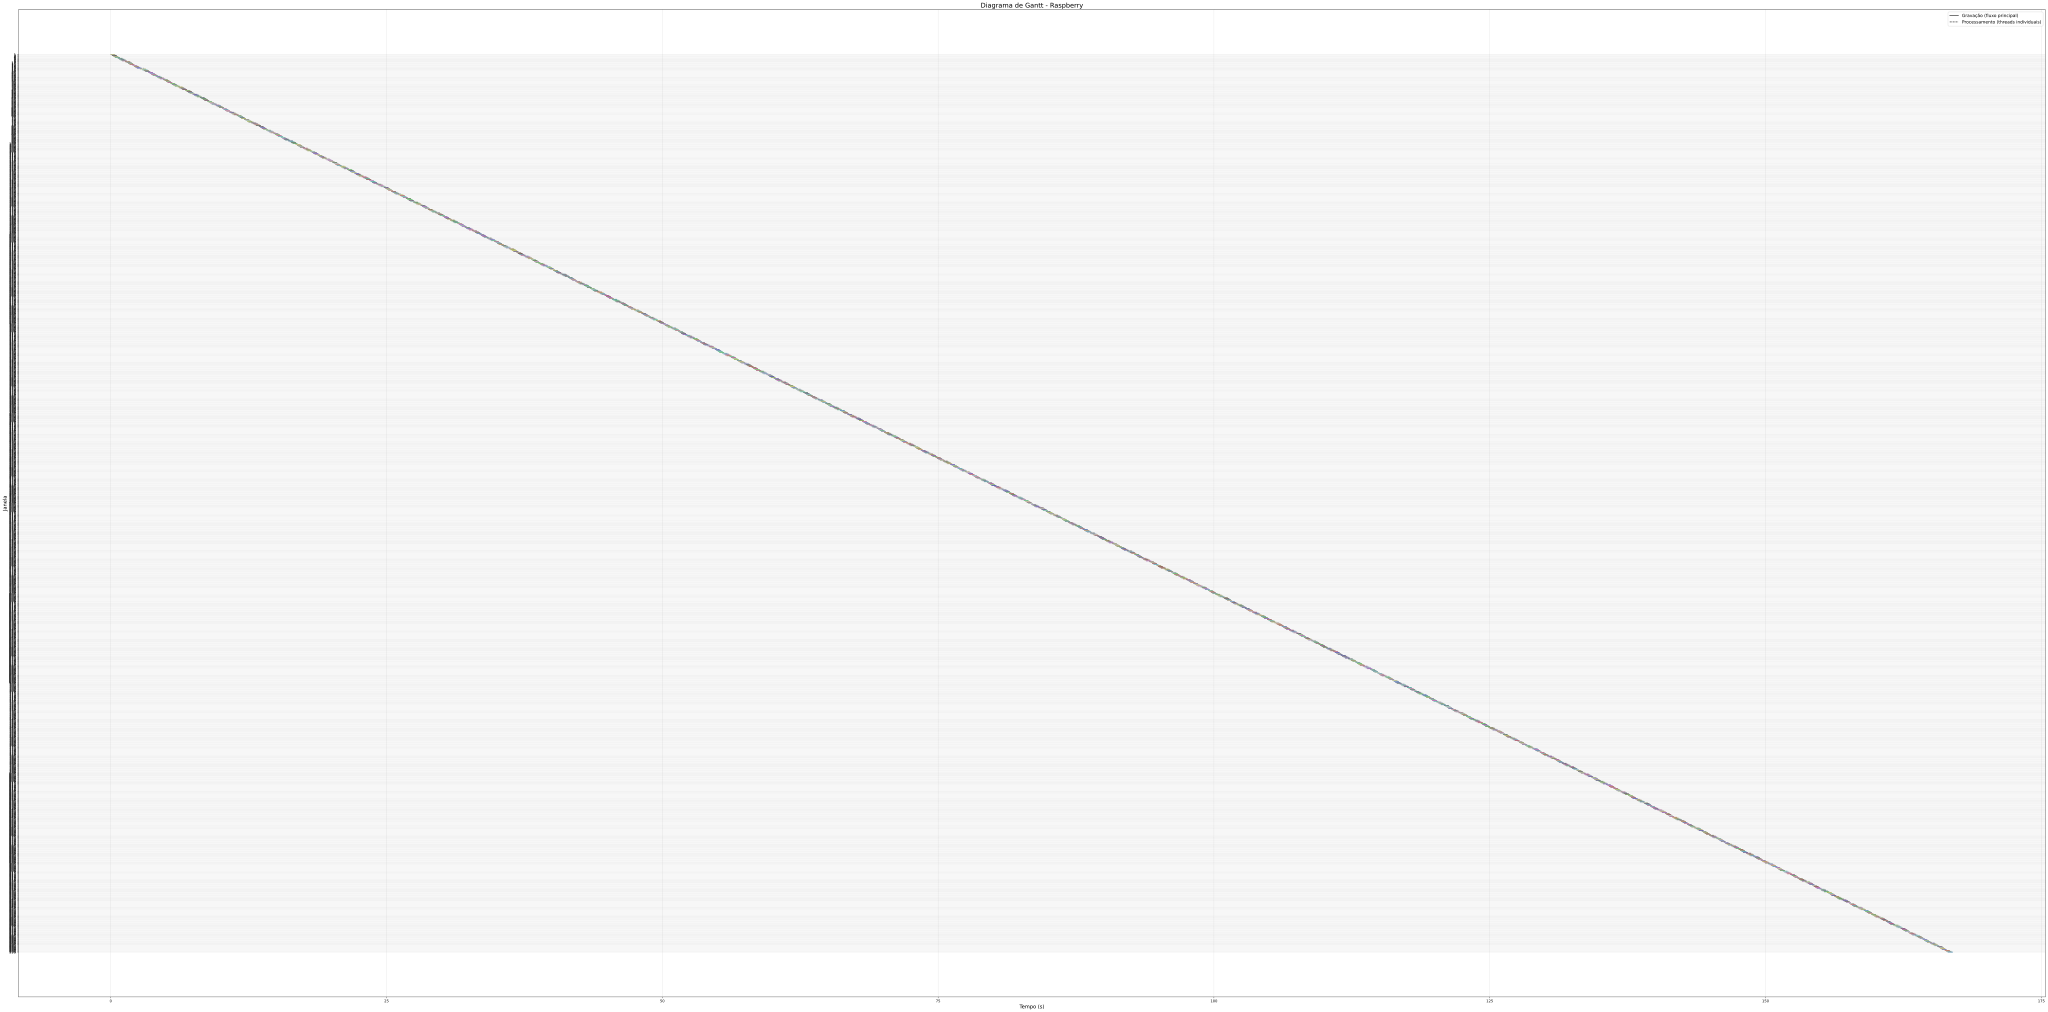

In [5]:
caminhoSalvar = "/home/pi/Programming/IC2019/Raspberry/Resultados/"
tempoJanela   = 0.2
deJanela      = 1
ateJanela     = deJanela + 998
yTicks        = []

for i, chave in enumerate(dictGeral):
    
    # VERIFICANDO SE DEVO PLOTAR MSM ISSO AI
    if int(chave) < deJanela or int(chave) > ateJanela:
        continue
    
    # AJUSTANDO O EIXO X DA ITERACAO ATUAL
    inicioGravacao      = dictGeral[chave]["iniciogravacao"] - tempoReferencia
    fimGravacao         = dictGeral[chave]["fimgravacao"] - tempoReferencia
    inicioProcessamento = dictGeral[chave]["inicioprocessamento"] - tempoReferencia
    fimProcessamento    = dictGeral[chave]["fimprocessamento"] - tempoReferencia
    
    # DEFININDO A COR
    corAtual = corAleatoria()
    
    # COLOCANDO A ITERACAO ATUAL NO YTICKS
    yTicks.append(chave)
    
    # PLOTANDO
    if i == deJanela:
        plt.plot([inicioGravacao, fimGravacao], [i, i], "-", color="black", label="Gravação (fluxo principal)")
        plt.plot([inicioProcessamento, fimProcessamento], [i, i], "--", color="black", label="Processamento (threads individuais)")
    else:
        plt.plot([inicioGravacao, fimGravacao], [i, i], "-", color=corAtual)
        plt.plot([inicioProcessamento, fimProcessamento], [i, i], "--", color=corAtual)

# AJUSTANDO MAIS PARAMETROS
plt.title("Diagrama de Gantt - Raspberry")
plt.ylabel("Janela")
plt.xlabel("Tempo (s)")
plt.legend()
#plt.xlim(-tempoJanela, fimProcessamento)
#plt.xticks(ticks=np.arange(-tempoJanela, fimProcessamento+tempoJanela, tempoJanela), rotation=45)
plt.yticks(ticks=np.arange(deJanela-1, ateJanela), labels=yTicks)
plt.gca().invert_yaxis()
plt.grid(alpha=0.4)
plt.savefig(caminhoSalvar+"diagramaGantt_raspberry.pdf", format='pdf', bbox_inches='tight')
plt.show()

In [6]:
dictGeral

{'1': {'iniciogravacao': 1595026288.5060432,
  'fimgravacao': 1595026288.767382,
  'inicioprocessamento': 1595026288.767983,
  'fimprocessamento': 1595026288.9164665},
 '2': {'iniciogravacao': 1595026288.6358545,
  'fimgravacao': 1595026288.900511,
  'inicioprocessamento': 1595026288.9013753,
  'fimprocessamento': 1595026289.0626438},
 '3': {'iniciogravacao': 1595026288.7687304,
  'fimgravacao': 1595026289.0338655,
  'inicioprocessamento': 1595026289.034386,
  'fimprocessamento': 1595026289.1956816},
 '4': {'iniciogravacao': 1595026288.9019892,
  'fimgravacao': 1595026289.166816,
  'inicioprocessamento': 1595026289.1673257,
  'fimprocessamento': 1595026289.3688235},
 '5': {'iniciogravacao': 1595026289.1680112,
  'fimgravacao': 1595026289.433633,
  'inicioprocessamento': 1595026289.4341002,
  'fimprocessamento': 1595026289.580201},
 '6': {'iniciogravacao': 1595026289.3007333,
  'fimgravacao': 1595026289.566558,
  'inicioprocessamento': 1595026289.5672152,
  'fimprocessamento': 159502628